# **CARGAMOS DATASET**

In [1]:
import pandas as pd
path: str = './titanic_train.csv'
df: pd.DataFrame = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **INFORME DE DATASET**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **ELIMINAMOS COLUMNAS NO IMPORTANTES**

In [3]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
no_nuls: pd.Series = df.isnull().sum()
no_nuls[no_nuls > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer_mode.fit_transform(df[['Embarked']])
imputer_new_class = SimpleImputer(strategy='constant', fill_value='Unknown')
df[['Cabin']] = imputer_new_class.fit_transform(df[['Cabin']])
no_nuls: pd.Series = df.isnull().sum()
no_nuls[no_nuls > 0]


Age    177
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder_sex = OneHotEncoder(drop='first', sparse_output=False)
encoded_sex: np.ndarray = encoder_sex.fit_transform(df[['Sex']])
encoded_cols: np.ndarray = encoder_sex.get_feature_names_out(['Sex'])
df.drop(columns=['Sex'], inplace=True)
df[encoded_cols] = encoded_sex
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,Unknown,S,1.0
1,1,1,38.0,1,0,71.2833,C85,C,0.0
2,1,3,26.0,0,0,7.9250,Unknown,S,0.0
3,1,1,35.0,1,0,53.1000,C123,S,0.0
4,0,3,35.0,0,0,8.0500,Unknown,S,1.0


In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder_embarked = OrdinalEncoder(categories=[['S', 'C', 'Q']])
df[['Embarked']] = encoder_embarked.fit_transform(df[['Embarked']])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,Unknown,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,1.0,0.0
2,1,3,26.0,0,0,7.9250,Unknown,0.0,0.0
3,1,1,35.0,1,0,53.1000,C123,0.0,0.0
4,0,3,35.0,0,0,8.0500,Unknown,0.0,1.0


In [8]:
df['Deck'] = df['Cabin'].str[0]
df.drop(columns=['Cabin'], inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0,3,22.0,1,0,7.2500,0.0,1.0,U
1,1,1,38.0,1,0,71.2833,1.0,0.0,C
2,1,3,26.0,0,0,7.9250,0.0,0.0,U
3,1,1,35.0,1,0,53.1000,0.0,0.0,C
4,0,3,35.0,0,0,8.0500,0.0,1.0,U


In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder_deck = OrdinalEncoder(
    categories=[["A", "B", "C", "D", "E", "F", "G", "T", "U"]]
)
df[["Deck"]] = encoder_deck.fit_transform(df[["Deck"]])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0,3,22.0,1,0,7.2500,0.0,1.0,8.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,2.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,8.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,2.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,8.0


In [10]:
df_know_age: pd.DataFrame = df[df['Age'].notnull()]
df_know_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0,3,22.0,1,0,7.2500,0.0,1.0,8.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,2.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,8.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,2.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,8.0


In [11]:
df_unknown_age: pd.DataFrame = df[df['Age'].isnull()]
df_unknown_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
5,0,3,NaN,0,0,8.4583,2.0,1.0,8.0
17,1,2,NaN,0,0,13.0000,0.0,1.0,8.0
19,1,3,NaN,0,0,7.2250,1.0,0.0,8.0
26,0,3,NaN,0,0,7.2250,1.0,1.0,8.0
28,1,3,NaN,0,0,7.8792,2.0,0.0,8.0


In [12]:
X: pd.DataFrame = df_know_age.drop(columns=['Age', 'Survived'])
y: pd.Series = df_know_age['Age']

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [14]:
features_importance: pd.DataFrame = pd.DataFrame({
    'feature': X.columns,
    'importance': dtr.feature_importances_ * 100
}).sort_values(by='importance', ascending=False)
features_importance


,feature,importance
3,Fare,32.578404
2,Parch,21.200802
0,Pclass,19.060355
1,SibSp,8.838587
6,Deck,6.728509
4,Embarked,5.990288
5,Sex_male,5.603055


In [15]:
features_for_age: list[str] = ['Fare', 'Parch', 'Pclass', 'SibSp', 'Deck']
X_train: pd.DataFrame = df_know_age[features_for_age]
y_train: pd.Series = df_know_age['Age']
X_test: pd.DataFrame = df_unknown_age[features_for_age]

# **SELECCION MODELO DE REGRESION PARA PREDECIR EDAD**

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [17]:
y_predict: np.ndarray = model.predict(X_test) 

In [18]:
df.loc[df['Age'].isnull(), 'Age'] = y_predict
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0,3,22.0,1,0,7.2500,0.0,1.0,8.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,2.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,8.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,2.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,8.0


In [19]:
from sklearn.preprocessing import StandardScaler
cols_selected: list[str] = df.drop(columns='Survived').columns.tolist()
scaler = StandardScaler()
df[cols_selected] = scaler.fit_transform(df[cols_selected])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0,0.827377,-0.557266,0.432793,-0.473674,-0.502445,-0.568837,0.737695,0.522067
1,1,-1.566107,0.619836,0.432793,-0.473674,0.786845,1.005181,-1.355574,-1.917594
2,1,0.827377,-0.262991,-0.474545,-0.473674,-0.488854,-0.568837,-1.355574,0.522067
3,1,-1.566107,0.399129,0.432793,-0.473674,0.420730,-0.568837,-1.355574,-1.917594
4,0,0.827377,0.399129,-0.474545,-0.473674,-0.486337,-0.568837,0.737695,0.522067


In [20]:
X: pd.DataFrame = df.drop(columns=['Survived'])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Deck
0,0.827377,-0.557266,0.432793,-0.473674,-0.502445,-0.568837,0.737695,0.522067
1,-1.566107,0.619836,0.432793,-0.473674,0.786845,1.005181,-1.355574,-1.917594
2,0.827377,-0.262991,-0.474545,-0.473674,-0.488854,-0.568837,-1.355574,0.522067
3,-1.566107,0.399129,0.432793,-0.473674,0.420730,-0.568837,-1.355574,-1.917594
4,0.827377,0.399129,-0.474545,-0.473674,-0.486337,-0.568837,0.737695,0.522067


In [21]:
y: pd.Series = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [23]:
features_importance: pd.DataFrame = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc.feature_importances_ * 100
}).sort_values(by='importance', ascending=False)

features_importance

,feature,importance
6,Sex_male,30.602149
1,Age,26.542990
4,Fare,21.176632
0,Pclass,8.249135
7,Deck,5.657963
2,SibSp,4.541153
3,Parch,2.003771
5,Embarked,1.226207


In [24]:
features: list[str] = ['Sex_male', 'Age', 'Fare', 'Pclass', 'Deck']
X: pd.DataFrame = X[features]
X.head()

,Sex_male,Age,Fare,Pclass,Deck
0,0.737695,-0.557266,-0.502445,0.827377,0.522067
1,-1.355574,0.619836,0.786845,-1.566107,-1.917594
2,-1.355574,-0.262991,-0.488854,0.827377,0.522067
3,-1.355574,0.399129,0.420730,-1.566107,-1.917594
4,0.737695,0.399129,-0.486337,0.827377,0.522067


In [25]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(
  X, 
  y, 
  train_size=0.8,
  test_size=0.2,
  random_state=42,
  shuffle=True,
)

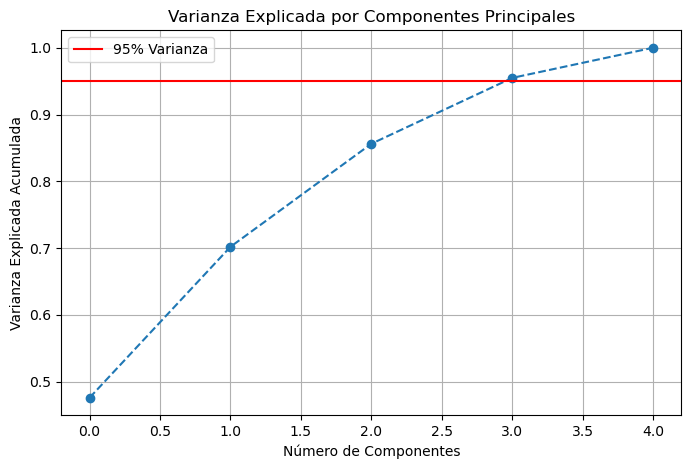

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca_analysis = PCA().fit(X_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_analysis.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza')
plt.legend(loc='best')
plt.show()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca: np.ndarray = pca.fit_transform(X_train)
X_test_pca: np.ndarray = pca.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred: np.ndarray = model.predict(X_test_pca)

# **RESULTADOS**

In [30]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {precision: .2f}%")

Accuracy:  87.71%
